# Exploratory data analysis (EDA) on the IMDb movie reviews dataset

Summary of the notebook **`1-Sentiment-Analysis-EDA.ipynb`**

---
### This notebook performs EDA

1. **Mount Google Drive** to access the dataset.
2. **Load dataset**: 50,000 labeled movie reviews (positive or negative).
3. **Target distribution**: Reviews are **evenly split** between positive and negative.
4. **Review lengths**:

   * Range from **4 to 2,470 words**.
5. **Outliers detected** using:

   * **Interquartile Range (IQR)**
   * **Standard deviation (±3σ)**
   * **Boxplot**
6. **Multiple histogram binning methods** used:

   * Fixed-width bins
   * Auto binning
   * Freedman–Diaconis
   * Sturges' Rule
7. **Kernel Density Estimate (KDE)** generated for smoothed word count distribution.

---

### 📋 Results Table

Since **no model training or evaluation** was done in this notebook, the results table is as follows:

| Model | Accuracy | File Name                                    | Any Brief Note                 |
| ----- | -------- | -------------------------------------------- | ------------------------------ |
| —     | —        | `1-Sentiment-Analysis-EDA.ipynb`             | EDA only — no models evaluated |

---

# 1. **Mount Google Drive** to access the dataset

In [ ]:
# 📌 Step 0: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 📦 Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
from scipy.stats import gaussian_kde

# 2. **Load dataset**: 50,000 labeled movie reviews (positive or negative).

In [ ]:
# 📁 Step 2: Load IMDB Dataset
# Reading the CSV file containing IMDB movie reviews and their sentiment labels
csv_path = '/content/drive/MyDrive/Colab Notebooks/0-both-batasets/IMDB Dataset.csv'
df = pd.read_csv(csv_path)

# Show dataset info (number of rows, columns, data types, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

# 3. **Target distribution**: Reviews are **evenly split** between positive and negative.

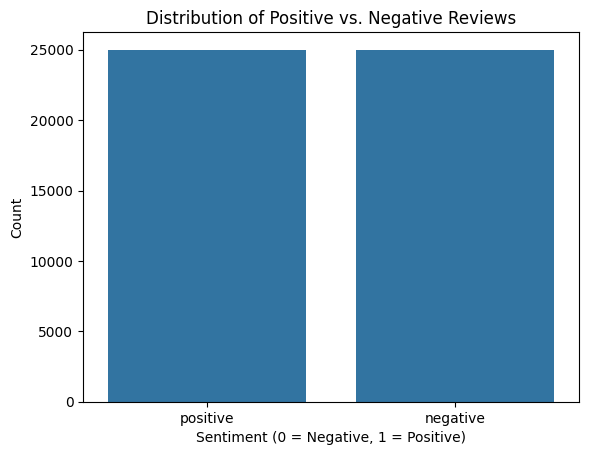

Positive Reviews: 25000
Negative Reviews: 25000
Ratio (Positive / Negative): 1.00


<ipython-input-25-11671709970f>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive_count = class_counts[1]
<ipython-input-25-11671709970f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  negative_count = class_counts[0]


In [ ]:
# ✅ Step 3: Target Variable Distribution
# Let's inspect how balanced the dataset is (positive vs. negative sentiment)
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Positive vs. Negative Reviews')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

# Count the number of positive and negative reviews
class_counts = df['sentiment'].value_counts()

# Extract the class counts
positive_count = class_counts[1]
negative_count = class_counts[0]
ratio = positive_count / negative_count

# Print class distribution and ratio
print(f"Positive Reviews: {positive_count}")
print(f"Negative Reviews: {negative_count}")
print(f"Ratio (Positive / Negative): {ratio:.2f}")

# 4. **Review lengths**:
   * Range from **4 to 2,470 words**.
   * Average length and distribution explored.

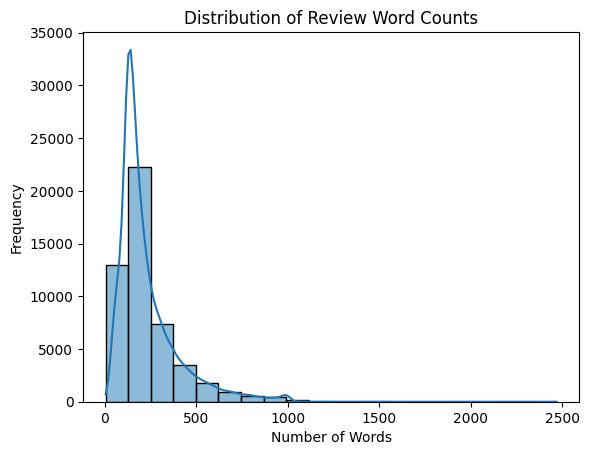

📝 Bottom 2 reviews (shortest):
                                                  review  review_length
28920  Primary plot!Primary direction!Poor interpreta...              4
27521                   Read the book, forget the movie!              6

📝 Top 2 reviews (longest):
                                                  review  review_length
31481  Match 1: Tag Team Table Match Bubba Ray and Sp...           2470
40521  There's a sign on The Lost Highway that says:<...           2278


In [ ]:
# ✅ Step 4: Review Length Distribution
# Add a column that stores the number of words in each review
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot the histogram of review lengths
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title('Distribution of Review Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Print the shortest 2 reviews
print("📝 Bottom 2 reviews (shortest):")
print(df.sort_values('review_length').head(2)[['review', 'review_length']])

# Print the longest 2 reviews
print("\n📝 Top 2 reviews (longest):")
print(df.sort_values('review_length', ascending=False).head(2)[['review', 'review_length']])

### Shortest and Longest reviews

In [43]:
# Shortest reviews
print("\n📉 Shortest Reviews:")
print(df.sort_values('review_length').head(3)[['review_length', 'review']])

# Longest reviews
print("\n📈 Longest Reviews:")
print(df.sort_values('review_length', ascending=False).head(3)[['review_length', 'review']])



📉 Shortest Reviews:
       review_length                                             review
28920              4  Primary plot!Primary direction!Poor interpreta...
27521              6                   Read the book, forget the movie!
40817              8  I hope this group of film-makers never re-unites.

📈 Longest Reviews:
       review_length                                             review
31481           2470  Match 1: Tag Team Table Match Bubba Ray and Sp...
40521           2278  There's a sign on The Lost Highway that says:<...
31436           2125  Back in the mid/late 80s, an OAV anime by titl...


### Identify and Display Longest Review

In [ ]:
# ✅ Step 5: Identify and Display Longest Review (Outlier)

# Find the maximum review length
max_length = df['review_length'].max()

# Retrieve the longest review text
outlier_review = df.loc[df['review_length'] == max_length, 'review'].values[0]

# Wrap the review text for better readability in output
wrapped_review = textwrap.fill(outlier_review, width=80)

# Print the length and content of the longest review
print(f"\n📌 Length of Longest Review: {max_length} words")
print("\n📌 Outlier Review (Longest):")
print(wrapped_review)



📌 Length of Longest Review: 2470 words

📌 Outlier Review (Longest):
Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and
Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table
Match against Eddie Guerrero and Chris Benoit. According to the rules of the
match, both opponents have to go through tables in order to get the win. Benoit
and Guerrero heated up early on by taking turns hammering first Spike and then
Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley
brother. Spike tried to help his brother, but the referee restrained him while
Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on
Bubba, Guerrero set up a table outside. Spike dashed into the ring and
somersaulted over the top rope onto Guerrero on the outside! After recovering
and taking care of Spike, Guerrero slipped a table into the ring and helped the
Wolverine set it up. The tandem then set up for a double superplex f

# 5. **Outliers detected** using:

   * **Interquartile Range (IQR)**
   * **Standard deviation (±3σ)**
   * **Boxplot**

### Interquartile Range (IQR)

In [ ]:
# Option 1: Detect Outliers Using Interquartile Range (IQR)
# Compute review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]

# Show summary
# print(f"Number of outliers: {len(outliers)}")
# print(outliers[['review_length', 'review']])             #.head()
outliers[['review_length', 'review']]

,review_length,review
26,570,"""The Cell"" is an exotic masterpiece, a dizzyin..."
29,615,'War movie' is a Hollywood genre that has been...
33,652,One of the most significant quotes from the en...
48,707,Preston Sturgis' THE POWER AND THE GLORY was u...
51,621,"***SPOILERS*** All too, in real life as well a..."
...,...,...
49946,535,One of the greatest lessons I ever had in how ...
49948,986,"It is the early morning of our discontent, and..."
49954,532,Why is it that every time I mention this movie...
49959,625,"My thoughts on the movie, 9<br /><br />It was ..."


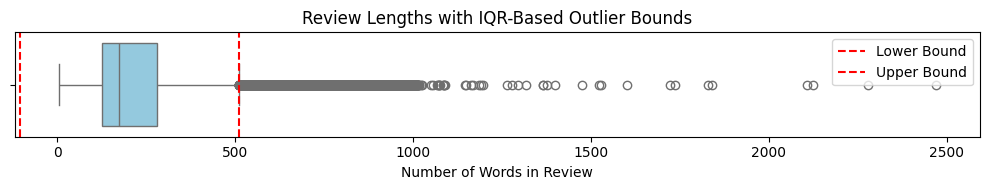

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Calculate IQR
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
iqr_outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]

# 📊 Visualization: Boxplot with IQR outliers
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='review_length', color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title("Review Lengths with IQR-Based Outlier Bounds")
plt.xlabel("Number of Words in Review")
plt.legend()
plt.tight_layout()
plt.show()

### Standard deviation (±3σ)

In [ ]:
# Option 2: Detect Outliers Using Standard Deviation
# Compute mean and standard deviation
mean_len = df['review_length'].mean()
std_len = df['review_length'].std()

# Define bounds: typically mean ± 2*std or ± 3*std
lower_bound = mean_len - 3 * std_len
upper_bound = mean_len + 3 * std_len

# Filter outliers
outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]

# Show summary
# print(f"Number of outliers (±3 std): {len(outliers)}")
# print(outliers[['review_length', 'review']])             #.head()
outliers[['review_length', 'review']]

,review_length,review
101,766,"Okay, last night, August 18th, 2004, I had the..."
156,845,From the film's first shot - Keira Knightley a...
177,761,"Though I'd heard that ""Cama de Gato"" was the w..."
191,762,The Golden Door is the story of a Sicilian fam...
263,918,"There is a difference between a ""film,"" and a ..."
...,...,...
49803,832,"There is NOTHING cool, hip, or clever about th..."
49833,1148,THE SHOP AROUND THE CORNER is one of the sweet...
49861,966,"OK OK, it might be hard to put the entirety of..."
49948,986,"It is the early morning of our discontent, and..."


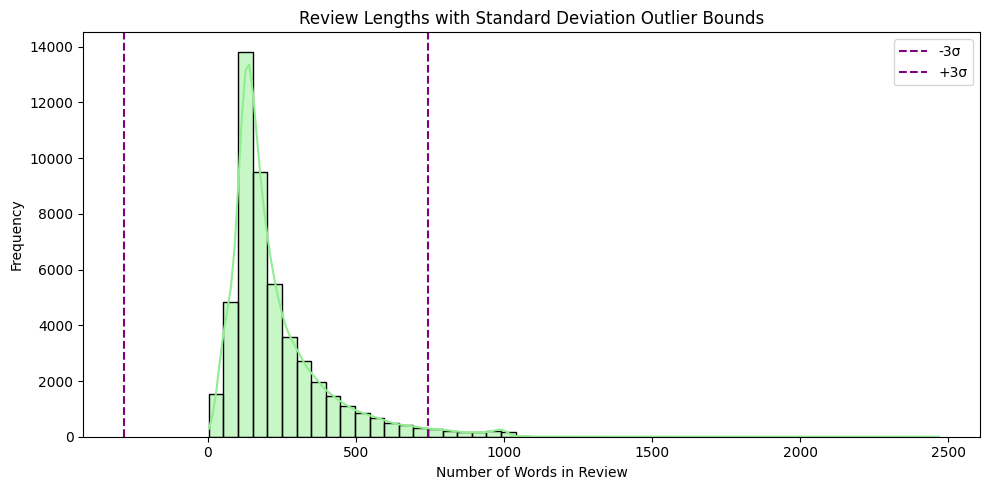

In [ ]:
# Compute mean and standard deviation
mean_len = df['review_length'].mean()
std_len = df['review_length'].std()

# Define bounds
lower_bound = mean_len - 3 * std_len
upper_bound = mean_len + 3 * std_len

# Filter outliers
std_outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]

# 📊 Visualization: Histogram with ±3σ bounds
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True, color='lightgreen', edgecolor='black')
plt.axvline(lower_bound, color='purple', linestyle='--', label='-3σ')
plt.axvline(upper_bound, color='purple', linestyle='--', label='+3σ')
plt.title("Review Lengths with Standard Deviation Outlier Bounds")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


### Boxplot

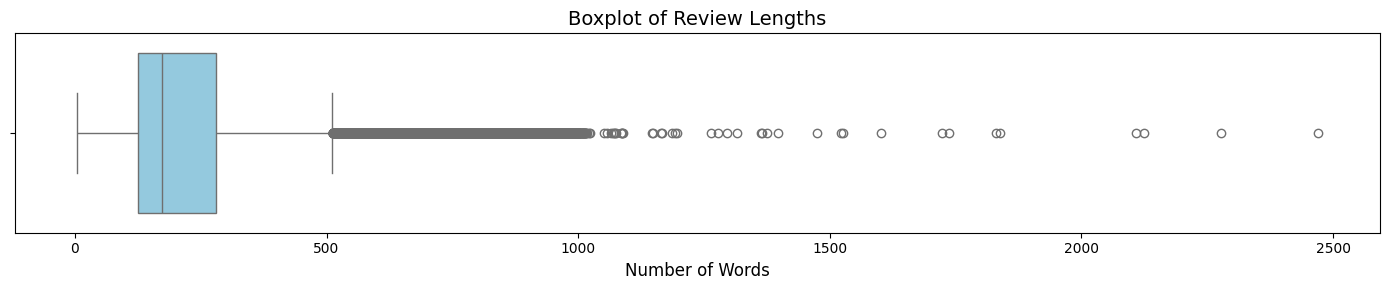

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size: wider plot (e.g., 14 inches wide, 3 inches tall)
plt.figure(figsize=(14, 3))

# Create the boxplot
sns.boxplot(data=df, x='review_length', color='skyblue')

# Add title and label
plt.title('Boxplot of Review Lengths', fontsize=14)
plt.xlabel('Number of Words', fontsize=12)

# Improve spacing
plt.tight_layout()
plt.show()


# 6. **Multiple histogram binning methods** used:

   * Fixed-width bins
   * Auto binning
   * Freedman–Diaconis
   * Sturges' Rule

#### Fixed-Width Bins

In [ ]:
# 1. Fixed-Width Bins (Manual Range)
import numpy as np

# Fixed-width bins from 20 to 1000, step of 50
bin_edges = np.arange(20, 1050, 50)
counts, _ = np.histogram(filtered_df['review_length'], bins=bin_edges)

print("📊 Fixed-Width Binning")
for i in range(len(counts)):
    print(f"Words: {bin_edges[i]}–{bin_edges[i+1]-1}, Count: {counts[i]}")


📊 Fixed-Width Binning
Words: 20–69, Count: 3091
Words: 70–119, Count: 7063
Words: 120–169, Count: 14085
Words: 170–219, Count: 7758
Words: 220–269, Count: 4694
Words: 270–319, Count: 3273
Words: 320–369, Count: 2388
Words: 370–419, Count: 1737
Words: 420–469, Count: 1332
Words: 470–519, Count: 986
Words: 520–569, Count: 790
Words: 570–619, Count: 606
Words: 620–669, Count: 446
Words: 670–719, Count: 381
Words: 720–769, Count: 287
Words: 770–819, Count: 254
Words: 820–869, Count: 192
Words: 870–919, Count: 155
Words: 920–969, Count: 160
Words: 970–1019, Count: 213


### Auto Binning

In [ ]:
# 🔹 2. NumPy’s 'auto' Bin Estimator
import numpy as np

# NumPy auto binning
counts, bin_edges = np.histogram(filtered_df['review_length'], bins='auto')

print(f"\n📊 Optimal Binning (method='auto') — Total Bins: {len(counts)}")
for i in range(len(counts)):
    print(f"Words: {int(bin_edges[i])}–{int(bin_edges[i+1]-1)}, Count: {counts[i]}")


📊 Optimal Binning (method='auto') — Total Bins: 118
Words: 20–27, Count: 66
Words: 28–35, Count: 174
Words: 36–43, Count: 459
Words: 44–52, Count: 823
Words: 53–60, Count: 820
Words: 61–68, Count: 749
Words: 69–77, Count: 851
Words: 78–85, Count: 738
Words: 86–93, Count: 752
Words: 94–102, Count: 1074
Words: 103–110, Count: 1479
Words: 111–118, Count: 2169
Words: 119–126, Count: 2748
Words: 127–135, Count: 3008
Words: 136–143, Count: 2406
Words: 144–151, Count: 2123
Words: 152–160, Count: 2072
Words: 161–168, Count: 1728
Words: 169–176, Count: 1542
Words: 177–185, Count: 1551
Words: 186–193, Count: 1285
Words: 194–201, Count: 1190
Words: 202–210, Count: 1171
Words: 211–218, Count: 1019
Words: 219–226, Count: 891
Words: 227–234, Count: 873
Words: 235–243, Count: 855
Words: 244–251, Count: 734
Words: 252–259, Count: 634
Words: 260–268, Count: 707
Words: 269–276, Count: 559
Words: 277–284, Count: 560
Words: 285–293, Count: 645
Words: 294–301, Count: 514
Words: 302–309, Count: 512
Words: 

### Freedman–Diaconis

In [ ]:
# 🔹 3. NumPy’s 'fd' (Freedman–Diaconis) Rule
import numpy as np

# Freedman–Diaconis rule
counts, bin_edges = np.histogram(filtered_df['review_length'], bins='fd')

print(f"\n📊 Freedman–Diaconis Binning (method='fd') — Total Bins: {len(counts)}")
for i in range(len(counts)):
    print(f"Words: {int(bin_edges[i])}–{int(bin_edges[i+1]-1)}, Count: {counts[i]}")



📊 Freedman–Diaconis Binning (method='fd') — Total Bins: 118
Words: 20–27, Count: 66
Words: 28–35, Count: 174
Words: 36–43, Count: 459
Words: 44–52, Count: 823
Words: 53–60, Count: 820
Words: 61–68, Count: 749
Words: 69–77, Count: 851
Words: 78–85, Count: 738
Words: 86–93, Count: 752
Words: 94–102, Count: 1074
Words: 103–110, Count: 1479
Words: 111–118, Count: 2169
Words: 119–126, Count: 2748
Words: 127–135, Count: 3008
Words: 136–143, Count: 2406
Words: 144–151, Count: 2123
Words: 152–160, Count: 2072
Words: 161–168, Count: 1728
Words: 169–176, Count: 1542
Words: 177–185, Count: 1551
Words: 186–193, Count: 1285
Words: 194–201, Count: 1190
Words: 202–210, Count: 1171
Words: 211–218, Count: 1019
Words: 219–226, Count: 891
Words: 227–234, Count: 873
Words: 235–243, Count: 855
Words: 244–251, Count: 734
Words: 252–259, Count: 634
Words: 260–268, Count: 707
Words: 269–276, Count: 559
Words: 277–284, Count: 560
Words: 285–293, Count: 645
Words: 294–301, Count: 514
Words: 302–309, Count: 512

### Sturges Rule

In [ ]:
# 🔹 4. NumPy’s 'sturges' Rule
import numpy as np

# Sturges' rule
counts, bin_edges = np.histogram(filtered_df['review_length'], bins='sturges')

print(f"\n📊 Sturges Binning (method='sturges') — Total Bins: {len(counts)}")
for i in range(len(counts)):
    print(f"Words: {int(bin_edges[i])}–{int(bin_edges[i+1]-1)}, Count: {counts[i]}")



📊 Sturges Binning (method='sturges') — Total Bins: 17
Words: 20–76, Count: 3862
Words: 77–134, Count: 11752
Words: 135–191, Count: 12684
Words: 192–249, Count: 6883
Words: 250–307, Count: 4180
Words: 308–364, Count: 2815
Words: 365–422, Count: 2047
Words: 423–480, Count: 1458
Words: 481–537, Count: 1050
Words: 538–595, Count: 818
Words: 596–653, Count: 566
Words: 654–710, Count: 458
Words: 711–768, Count: 344
Words: 769–826, Count: 293
Words: 827–883, Count: 193
Words: 884–941, Count: 182
Words: 942–999, Count: 306


### Optimal Binning (method='auto') — Total Bins: 295


📊 Optimal Binning (method='auto') — Total Bins: 295
Words: 4–11, Count: 11
Words: 12–19, Count: 19
Words: 20–28, Count: 76
Words: 29–36, Count: 194
Words: 37–44, Count: 497
Words: 45–53, Count: 851
Words: 54–61, Count: 822
Words: 62–69, Count: 748
Words: 70–78, Count: 852
Words: 79–86, Count: 724
Words: 87–94, Count: 780
Words: 95–103, Count: 1115
Words: 104–111, Count: 1569
Words: 112–120, Count: 2539
Words: 121–128, Count: 2829
Words: 129–136, Count: 2636
Words: 137–145, Count: 2636
Words: 146–153, Count: 2058
Words: 154–161, Count: 1782
Words: 162–170, Count: 1979
Words: 171–178, Count: 1452
Words: 179–186, Count: 1374
Words: 187–195, Count: 1441
Words: 196–203, Count: 1134
Words: 204–211, Count: 1015
Words: 212–220, Count: 1145
Words: 221–228, Count: 872
Words: 229–237, Count: 929
Words: 238–245, Count: 761
Words: 246–253, Count: 705
Words: 254–262, Count: 710
Words: 263–270, Count: 612
Words: 271–278, Count: 554
Words: 279–287, Count: 639
Words: 288–295, Count: 537
Words: 296–303

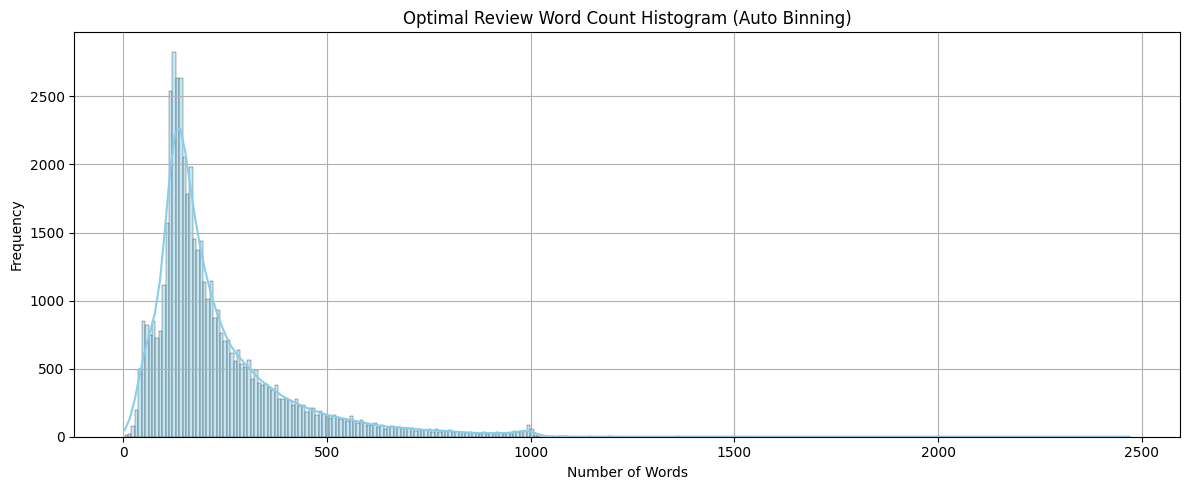

In [44]:
# ✨ Updated Code Using NumPy’s 'auto' Bin Estimator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use full dataset (no filtering)
review_lengths = df['review_length']

# Step 2: Use NumPy to auto-calculate bin edges
counts, bin_edges = np.histogram(review_lengths, bins='auto')

# Step 3: Print bin ranges and counts
print(f"\n📊 Optimal Binning (method='auto') — Total Bins: {len(bin_edges)-1}")
for i in range(len(counts)):
    print(f"Words: {int(bin_edges[i])}–{int(bin_edges[i+1]) - 1}, Count: {counts[i]}")

# Step 4: Visualize with seaborn (optional)
plt.figure(figsize=(12, 5))
sns.histplot(review_lengths, bins=bin_edges, kde=True, color="skyblue", edgecolor="black")
plt.title('Optimal Review Word Count Histogram (Auto Binning)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. **Kernel Density Estimate (KDE)** generated for smoothed word count distribution.

In [34]:

# ✅ Step 8: Compute and Print KDE (Smoothed Density)
# Fit Kernel Density Estimate using scipy
filtered_lengths = filtered_df['review_length']
kde = gaussian_kde(filtered_lengths)

# Create values over which to evaluate KDE
x_vals = np.linspace(min(filtered_lengths), max(filtered_lengths), 200)
y_vals = kde(x_vals)

# Print the KDE values
print("\n📈 KDE (Smoothed Density) Values:")
for x, y in zip(x_vals, y_vals):
    print(f"Words: {x:.2f}, Density: {y:.6f}")



📈 KDE (Smoothed Density) Values:
Words: 20.00, Density: 0.000376
Words: 24.92, Density: 0.000515
Words: 29.85, Density: 0.000678
Words: 34.77, Density: 0.000858
Words: 39.70, Density: 0.001044
Words: 44.62, Density: 0.001228
Words: 49.55, Density: 0.001399
Words: 54.47, Density: 0.001552
Words: 59.40, Density: 0.001685
Words: 64.32, Density: 0.001802
Words: 69.25, Density: 0.001915
Words: 74.17, Density: 0.002038
Words: 79.10, Density: 0.002187
Words: 84.02, Density: 0.002379
Words: 88.94, Density: 0.002627
Words: 93.87, Density: 0.002935
Words: 98.79, Density: 0.003301
Words: 103.72, Density: 0.003710
Words: 108.64, Density: 0.004137
Words: 113.57, Density: 0.004551
Words: 118.49, Density: 0.004919
Words: 123.42, Density: 0.005213
Words: 128.34, Density: 0.005410
Words: 133.27, Density: 0.005503
Words: 138.19, Density: 0.005494
Words: 143.12, Density: 0.005397
Words: 148.04, Density: 0.005231
Words: 152.96, Density: 0.005018
Words: 157.89, Density: 0.004778
Words: 162.81, Density: 0.